In [2]:
import os
import sys
import numpy as np
import pandas as pd
import math
from scipy import stats
import matplotlib.pyplot as plt
from scipy.signal import argrelextrema
from scipy import optimize

In [9]:
path1 = r'C:\mNG_Exp1'
path2 = r'C:\mNG_Exp2'
path3 =  r'C:/Intensity_analysis/'

list0916=[]
list0821=[]
for file in os.listdir(path1):
    current = os.path.splitext(file)[0]
    list0821.append(current)
    
for file in os.listdir(path2):
    current = os.path.splitext(file)[0]
    list0916.append(current)

In [3]:
path1 = r'C:\WorkStudy\UCSF\mNG_Clover_paper\20190916_mNG_FITC'
path2 = r'C:\WorkStudy\UCSF\mNG_Clover_paper\20190821_mNG'
path3 =  r'C:/WorkStudy/UCSF/mNG_Clover_paper/20200512_sample threshold/with20_5fft/'

list0916=[]
list0821=[]
for file in os.listdir(path1):
    current = os.path.splitext(file)[0]
    list0916.append(current)
for file in os.listdir(path2):
    current = os.path.splitext(file)[0]
    list0821.append(current)

In [4]:
#histogram_average
def his_intensity(filename, path1,df,i):
    FITC_R = filename + "_Results.csv"
    Excel = pd.read_csv(path1 + FITC_R)
    Experiments=['_exp1', '_exp2']
    name=filename+Experiments[i]
   #use median of each cell to represent the overall intensity
    Intensity = Excel[["Median"]]
    #output name_number_median
    Intensity["log10_conc"] = Intensity.Median.apply(lambda x: np.log10(x))
    bins=np.arange(1,6,0.1)
    b=np.histogram(Intensity.log10_conc, bins=bins, weights=None, density=True)[0]
    c=b.tolist()
    c.append(0) #to match the index number to convert into dataframe
    df[name]=c
    return df

In [5]:
def plot_h(df,bins,c,legend):
    df["Mean"]=df.mean(axis=1, skipna=True, numeric_only=float)
    df["STD"]=df.std(axis=1, skipna=True, numeric_only=float)
    df["Maxi"]=df["Mean"]+df["STD"]
    df["Min"]=df["Mean"]-df["STD"]
    plt.fill_between(bins, df.Maxi, df.Min, color=c,alpha=0.1)#alpha is inverse_transparancy
    plt.plot(bins,df.Mean,color=c,label=legend)
    plt.legend(prop={'size': 14})
    plt.xlim(1,5)

<ipython-input-4-a7a556731431>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Intensity["log10_conc"] = Intensity.Median.apply(lambda x: np.log10(x))
<ipython-input-4-a7a556731431>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Intensity["log10_conc"] = Intensity.Median.apply(lambda x: np.log10(x))
<ipython-input-4-a7a556731431>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the

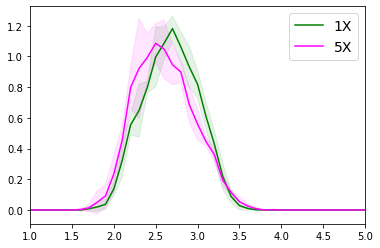

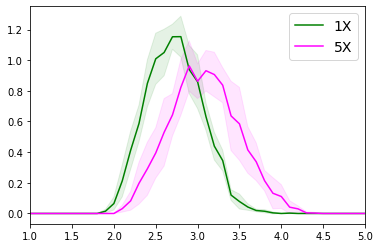

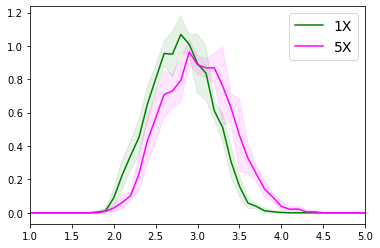

In [10]:
bins=np.arange(1,6,0.1)
#plot mNG2 from with FFT
fig, axs = plt.subplots()
name=[6,7]
df=pd.DataFrame()
for i in name:
    df=his_intensity(list0821[i], path3,df,0)
    df=his_intensity(list0916[i], path3,df,1)
plot_h(df,bins,"green","1X")

#plot 5xmNG2 from with FFT
name=[0,1]
df=pd.DataFrame()
for i in name:
    df=his_intensity(list0821[i], path3,df,0)
    df=his_intensity(list0916[i], path3,df,1)
plot_h(df,bins,"magenta","5X")

#plot mNG3A 
fig, axs = plt.subplots()
name=[8,9]
df=pd.DataFrame()
for i in name:
    df=his_intensity(list0821[i], path3,df,0)
    df=his_intensity(list0916[i], path3,df,1)
plot_h(df,bins,"green","1X")
       
#plot 5xmNG3Afrom with FFT
name=[2,3]
df=pd.DataFrame()
for i in name:
    df=his_intensity(list0821[i], path3,df,0)
    df=his_intensity(list0916[i], path3,df,1)
plot_h(df,bins,"magenta","5X")

#plot mNG3K 
fig, axs = plt.subplots()
name=[10,11]
df=pd.DataFrame()
for i in name:
    df=his_intensity(list0821[i], path3,df,0)
    df=his_intensity(list0916[i], path3,df,1)
plot_h(df,bins,"green","1X")

#plot 5xmNG3Kfrom with FFT
name=[4,5]
df=pd.DataFrame()
for i in name:
    df=his_intensity(list0821[i], path3,df,0)
    df=his_intensity(list0916[i], path3,df,1)
plot_h(df,bins,"magenta","5X")
